<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/04_DataScience_And_Visualization/blob/main/05_DataScience_Medicine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science: analytics for health and medicine

In this course, we will apply basic data science concepts for the medicine area. First, we will import ou data, and clean, process, analyze, and compare the information found. We will learn how important is an adequate visualization tool, and develop a critical sense when finding limitations of our study. Here, we will use data from the COVID19 crisis.

First, let's get our data. Here, we will import data from the GitHub of John Hopkins association:

In [141]:
import pandas as pd

covid19_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [142]:
covid19_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/22,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,179835,179835,180086,180122,180174,180259,180347,180419,180520,180584
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,275985,276012,276048,276081,276101,276101,276101,276221,276221,276310
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265862,265864,265870,265873,265873,265877,265884,265887,265889,265889
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,42894,42894,42894,42894,42894,42894,42894,42894,42894,43067
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99527,99527,99527,99527,99527,99761,99761,99761,99761,99761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,657573,657573,657573,657573,657573,657573,657705,657705,657705,657705
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11819,11819,11819,11819,11819,11822,11822,11822,11822,11822
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,321342,321399,321503,321503,321503,321503,321779,321915,321915,322207


Nice! In this dataset, we have access to the confirmed cases in many countries per day. Here, we have 285 rows and 868 columns.

In [143]:
covid19_cases.shape

(285, 868)

Let's see which countries are present in our dataset:

In [144]:
covid19_cases['Country/Region'].unique( )

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

Ok. Now, let's get the confirmed cases for a given country:

In [145]:
covid19_cases.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                  33.93911
Long                67.709953
1/22/20                     0
                     ...     
5/30/22                180259
5/31/22                180347
6/1/22                 180419
6/2/22                 180520
6/3/22                 180584
Name: 0, Length: 868, dtype: object

Great! Note that we have used the index to find these states. And if we want to get information from Brazil? We can do:

In [146]:
covid19_cases.set_index('Country/Region', inplace = True)
covid19_cases.loc['Brazil']

Province/State         NaN
Lat                -14.235
Long              -51.9253
1/22/20                  0
1/23/20                  0
                    ...   
5/30/22           30977661
5/31/22           31019038
6/1/22            31060017
6/2/22            31101290
6/3/22            31137479
Name: Brazil, Length: 867, dtype: object

To remove lat-long, we can simply do:

In [147]:
covid19_cases.loc['Brazil'][3:]

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
5/30/22    30977661
5/31/22    31019038
6/1/22     31060017
6/2/22     31101290
6/3/22     31137479
Name: Brazil, Length: 864, dtype: object

Nice! Now, we can draw a time series using:

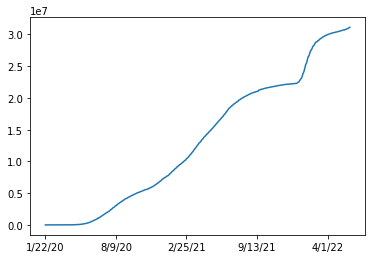

In [148]:
covid19_cases.loc['Brazil'][3:].plot( )

We can improve our visualization using other libraries. Let's do it:

In [149]:
brazil_cases = covid19_cases.loc['Brazil'][3:].to_frame( )
brazil_cases.index = pd.to_datetime(brazil_cases.index)
brazil_cases.columns = ['Cases']
brazil_cases

,Cases
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2022-05-30,30977661
2022-05-31,31019038
2022-06-01,31060017
2022-06-02,31101290


Text(0.0, 1.0, 'Confirmed cases in Brazil')

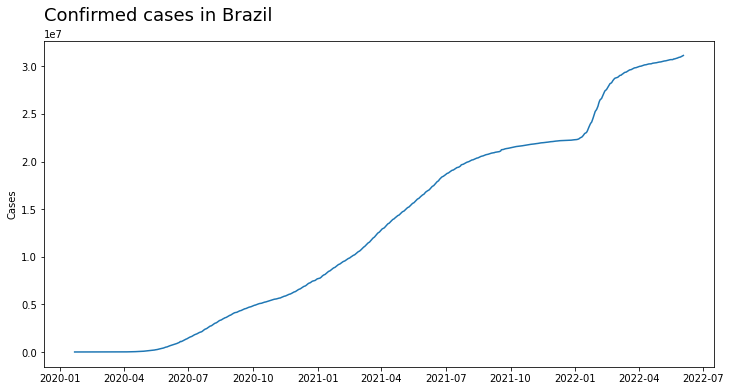

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12, 6))

ax = sns.lineplot(x = brazil_cases.index, y = brazil_cases.Cases)
ax.set_title('Confirmed cases in Brazil', loc = 'left', fontsize = 18, pad = 20)

Nice! Note that, here, we are shown the cumulative number of cases confirmed. Now that we have performed an initial exploration of our dataset to understand it, let's import two other sets, which store the number of deaths and the number of people recovered:

In [151]:
covid19_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
covid19_recovr = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

# Continuing with other visualization tools

Note that we have seen a time series for the cumulative number of cases confirmed. Let's try to see the number of daily new cases:

Text(0.0, 1.0, 'Confirmed cases in Brazil')

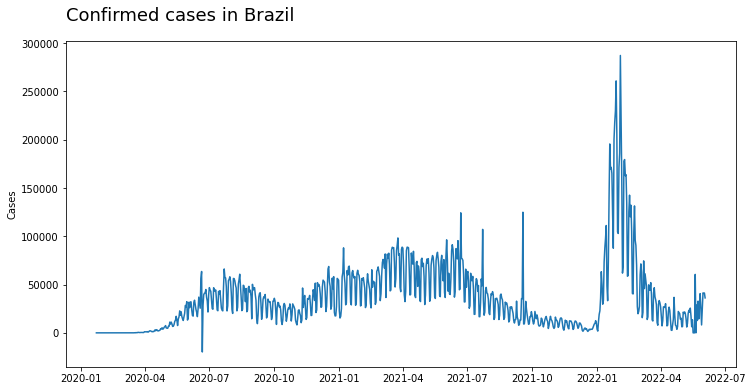

In [152]:
fig = plt.figure(figsize = (12, 6))

ax = sns.lineplot(x = brazil_cases.index, y = brazil_cases.Cases.diff(1))
ax.set_title('Confirmed cases in Brazil', loc = 'left', fontsize = 18, pad = 20)

Note that the number of confirmed cases has some peaks. For instance, in january-february of 2022, there were a lot of new cases. However, these soon stabilized after April 2022.

To compare values, for different countries, we can use different plots. For instance, let's get the number of confirmed cases in a given date:

In [153]:
date = '1/10/22'

covid19_cases[date]

Country/Region
Afghanistan             158394
Albania                 220487
Algeria                 222639
Andorra                  27983
Angola                   90316
                         ...  
West Bank and Gaza      472910
Winter Olympics 2022         0
Yemen                    10197
Zambia                  284389
Zimbabwe                223000
Name: 1/10/22, Length: 285, dtype: int64

Ok. Now, to visualize this data we can use some categorical plots. For instance, let's use a pie plot:

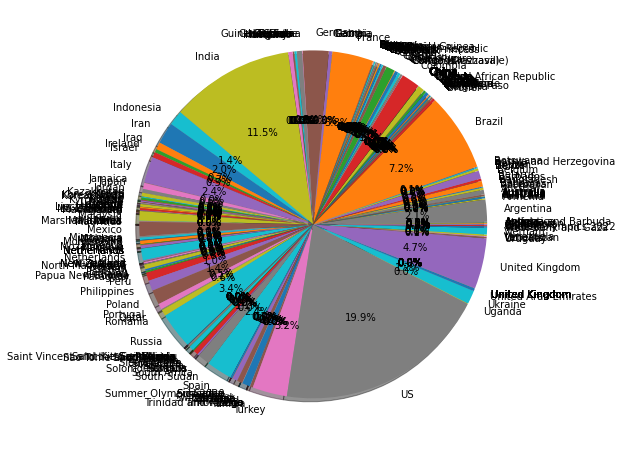

In [154]:
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.pie(covid19_cases[date].values, labels = covid19_cases[date].index, autopct = '%1.1f%%', shadow=True);

Note that the pie plot is terrible for this visualization. We can't really understand what is going on. In most cases, the pie plot is not good when we have many categories. Even when we have few categories, when these have similar frequencies, it is very hard to understand the relation between these frequencies. n these cases, we are better suited using a bar graph:

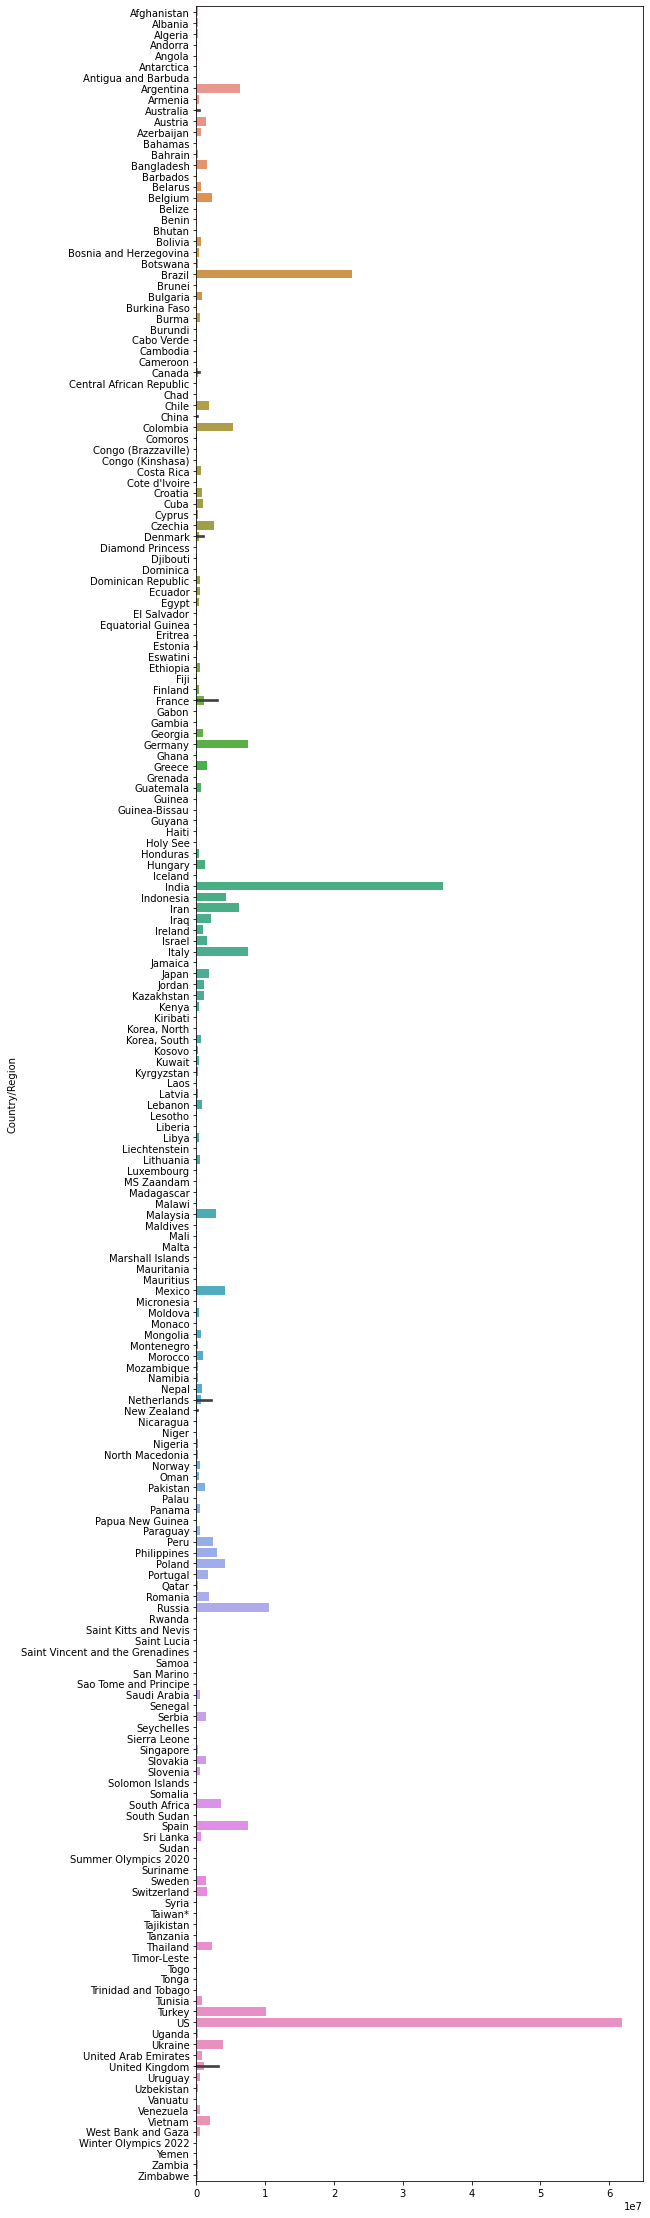

In [155]:
fig1, ax1 = plt.subplots(figsize=(8, 40))
sns.barplot(x = covid19_cases[date].values, y = covid19_cases[date].index);

Note that, still, due to the sheer number of countries, it is still hard to understand what is going on. However, this time, it is at least possible to identify which countries have more or less cases. To make it easier to identify the highest values, we can sort the values beforehand, and only print, for instance, the 10 highest values:

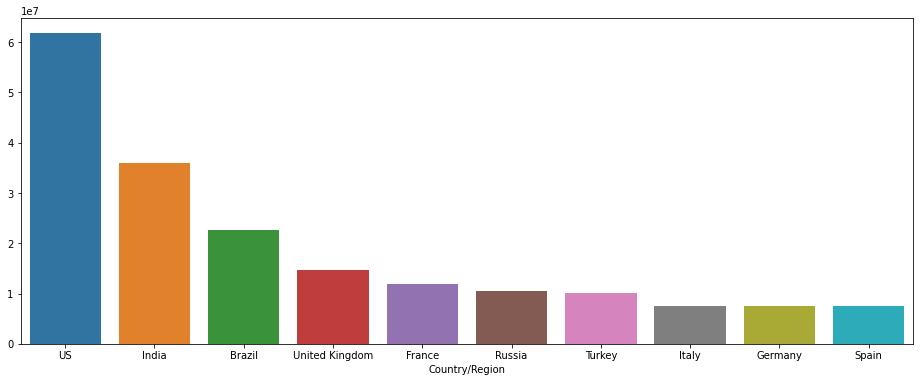

In [156]:
covid19_cases_day = covid19_cases[date].sort_values(ascending = False)

fig1, ax1 = plt.subplots(figsize=(16, 6))
sns.barplot(y = covid19_cases_day.values[0:10], x = covid19_cases_day.index[0:10]);

# Working with other datasets

Now, let's start working with our other datasets. We have already imported them, and they store information about the number of deaths and number of recoveries:

In [157]:
covid19_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/22,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7699,7699,7699,7701,7701,7701,7705,7707,7708,7708
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3497,3497,3497,3497,3497,3497,3497,3497,3497,3497
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5660,5660,5660,5660,5660,5660,5660,5660,5660,5660
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3985,3985,3985,3985,3985,3985,3987,3987,3987,3988


In [158]:
covid19_recovr

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/22,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Nice! Now, let's try to join all three datasets, considering the data for the last day. We can do so by:

In [159]:
cases  = covid19_cases.iloc[:, -1].to_frame( )
deaths = covid19_deaths.iloc[:, -1].to_frame( )
recovr = covid19_recovr.iloc[:, -1].to_frame( )

cases.index = covid19_cases.index; cases.columns = ['Cases']
deaths.index = covid19_deaths['Country/Region']; deaths.columns = ['Deaths']
recovr.index = covid19_recovr['Country/Region']; recovr.columns = ['Recover']

In [160]:
information = cases.join(deaths).join(recovr)
information

,Cases,Deaths,Recover
Country/Region,,,
Afghanistan,180584,7708,0
Albania,276310,3497,0
Algeria,265889,6875,0
Andorra,43067,153,0
Angola,99761,1900,0
...,...,...,...
West Bank and Gaza,657705,5660,0
Winter Olympics 2022,535,0,0
Yemen,11822,2149,0


Note that the number of rows increased. That happens when there are multiple rows with the same name in the right dataframe, when we perform the left join. To fix this, we can first unify these repeating rows:

In [161]:
last_day = covid19_cases.columns[-1]

tmp_cases  = covid19_cases.reset_index( )[['Country/Region', last_day]].groupby('Country/Region').sum( )
tmp_deaths = covid19_deaths[['Country/Region', last_day]].groupby('Country/Region').sum( )
tmp_recovr = covid19_recovr[['Country/Region', last_day]].groupby('Country/Region').sum( )

Let's check if the size of our dataframes is the same:

In [162]:
tmp_cases.shape

(199, 1)

In [163]:
tmp_cases.shape

(199, 1)

In [164]:
tmp_recovr.shape

(199, 1)

Nice! Now, everything seems fine. Now, let's rename our columns and join our dataframes:

In [165]:
tmp_cases.columns = ['Cases']
tmp_deaths.columns = ['Deaths']
tmp_recovr.columns = ['Recover']

In [166]:
information = tmp_cases.join(tmp_deaths).join(tmp_recovr)
information

,Cases,Deaths,Recover
Country/Region,,,
Afghanistan,180584,7708,0
Albania,276310,3497,0
Algeria,265889,6875,0
Andorra,43067,153,0
Angola,99761,1900,0
...,...,...,...
West Bank and Gaza,657705,5660,0
Winter Olympics 2022,535,0,0
Yemen,11822,2149,0


Nice! Note that, in the recovered columns, we only have zeros. This is likely an error on the dataset.

In [167]:
covid19_recovr

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/22,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
information

,Cases,Deaths,Recover
Country/Region,,,
Afghanistan,180584,7708,0
Albania,276310,3497,0
Algeria,265889,6875,0
Andorra,43067,153,0
Angola,99761,1900,0
...,...,...,...
West Bank and Gaza,657705,5660,0
Winter Olympics 2022,535,0,0
Yemen,11822,2149,0


But it is okay. Let's continue to work with our other two columns. For instance, let's evaluate our letality rate:

In [169]:
information['Letality'] = information.Deaths/information.Cases
information.sort_values(by = 'Letality', ascending = False, inplace = True)
information

,Cases,Deaths,Recover,Letality
Country/Region,,,,
"Korea, North",1,6,0,6.000000
MS Zaandam,9,2,0,0.222222
Yemen,11822,2149,0,0.181780
Sudan,62374,4942,0,0.079232
Peru,3583403,213228,0,0.059504
...,...,...,...,...
Marshall Islands,18,0,0,0.000000
Antarctica,11,0,0,0.000000
Summer Olympics 2020,865,0,0,0.000000


Note that there is some very strange data. North Korea has only 1 confirmed case, but 6 deaths. MS Zaandam, on the other hand, has very few confirmed cases. but a very high letality rate. Let's try to filter our contries, and leave only those with more than 20,000 confirmed cases:

In [170]:
info_filt = information.query('Cases > 20000')
info_filt

,Cases,Deaths,Recover,Letality
Country/Region,,,,
Sudan,62374,4942,0,0.079232
Peru,3583403,213228,0,0.059504
Syria,55894,3150,0,0.056357
Mexico,5782405,324966,0,0.056199
Somalia,26565,1361,0,0.051233
...,...,...,...,...
Singapore,1313849,1389,0,0.001057
New Zealand,1197257,1173,0,0.000980
Burundi,42129,38,0,0.000902


Ok. Now, our data makes more sense. Also, let's get the average letality rate in the entire world:

In [171]:
sum_info = information[['Cases', 'Deaths']].sum( )
avg_letal = sum_info.loc['Deaths']/sum_info.loc['Cases']
avg_letal

0.011849968252026425

So, 1.18% of the people which received a confirmed test of covid-19 died. That is a very high number, especially when we compare it to other similar diseases. 

Note that this way of evaluating the letality rate ignores the number of cases that are still being analyzed (the person did not recover yet). To fix this, another way of evaluating the letality rate would be to do:

\begin{equation}
L = \dfrac{n_{deaths}}{n_{deaths} + n_{recovered}}
\end{equation}

However, we saw that the number of recovered people is missing from our data. How can we estimate this number?

Well, we can consider that the covid19 cycle lasts about $x$ days. Thus, if the case was confirmed $x$ days ago, the person already most likely recovered (or died). Thus, let's try to evaluate this new letality rate considering $x$ = 14:

In [172]:
x = 14

past_day = covid19_cases.columns[-x]

tmp_cases  = covid19_cases.reset_index( )[['Country/Region', past_day]].groupby('Country/Region').sum( )
tmp_deaths = covid19_deaths[['Country/Region', past_day]].groupby('Country/Region').sum( )
tmp_recovr = covid19_recovr[['Country/Region', past_day]].groupby('Country/Region').sum( )

tmp_cases.columns = ['Cases']
tmp_deaths.columns = ['Deaths']
tmp_recovr.columns = ['Recover']

information_before = tmp_cases.join(tmp_deaths).join(tmp_recovr)

In [173]:
sum_info_past = information_before.sum( )

Note that, considering that the covid 19 cycle lasts about 14 days, if we have a case 14 days ago, the person has either died or recover. Thus, this number is the sum between $n_{deaths}$ and $n_{recover}$. This way, we simply do:

In [174]:
avg_letal2 = sum_info.loc['Deaths']/sum_info_past.loc['Cases']
avg_letal2

0.011995425454732214

Nice! Note that, since we already have many cases, the letality change was very minor. However, it did increase a little bit.

# Summarizing information

Note that when we evaluated the average letality rate across the world, it became easier to draw a conclusion. However, at the same time, we lost some information: how high is the letality rate in Brazil, for instance? Or in any other country?

To draw information from our data, we have to summarize information, trying to extract the most important aspects, but also without losing important information. Else, we may be passing the wrong information to the reader.

Let's try to summarize our information by using figures, as we did before. First, let's use a scatter plot to understand if there is any relation between the number of confirmed cases and the letality:

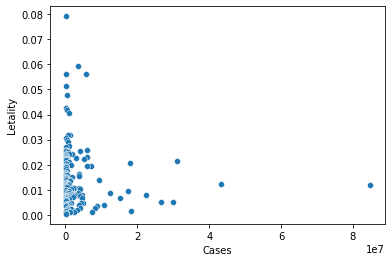

In [175]:
sns.scatterplot(x = 'Cases', y = 'Letality', data = info_filt)

It actually seems there is a very minor relationship between the number of cases and the letality. However, it seems that, as the number of cases increases, the letality decreases. This can be due to the higher importance each country gives to the disease when there is a lot of cases. Another thing to keep in mind is that, when we have few cases, outliers can be more visible, such as the Sudan cases with an almost 8% letality rate. However, since we removed those countries with less than 20,000 cases, this has a lower effect in our data.

Ok, now, let's try other visualization tool. Let's see the distribution of frequencies of letality rate. For that end, we can use a histplot:

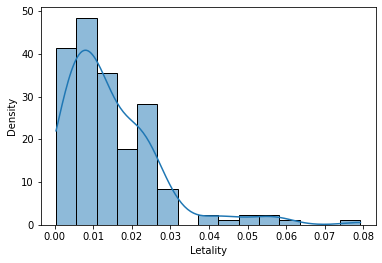

In [176]:
sns.histplot(x = 'Letality', data = info_filt, stat = 'density', kde = True)

So, it seems that most countries have a lower letality rate. 